<a href="https://colab.research.google.com/github/Hinten/fiap_fase6_cap1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================
# 📌 Verificação do ambiente
# =============================
import tensorflow as tf

print("✅ TensorFlow versão:", tf.__version__)
print("✅ GPU disponível:", tf.config.list_physical_devices('GPU'))

# Extra: mostra detalhes da GPU
!nvidia-smi



✅ TensorFlow versão: 2.19.0
✅ GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mon Sep 29 21:08:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   75C    P0             33W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                          

In [ ]:
# =============================
# 📌 Importações principais
# =============================
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# =============================
# 📌 Definição do path para imagens
# =============================

base_dir = "/content/drive/MyDrive/Cap6_Fase1"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [ ]:
# =============================
# 📌 Data Augmentation
# =============================

# Parâmetros de data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,           # normaliza as imagens
    rotation_range=30,        # gira aleatoriamente até 30 graus
    width_shift_range=0.1,    # deslocamento horizontal 10%
    height_shift_range=0.1,   # deslocamento vertical 10%
    shear_range=0.1,          # cisalhamento
    zoom_range=0.2,           # zoom aleatório até 20%
    horizontal_flip=True,     # flip horizontal
    fill_mode='nearest'       # preenche pixels vazios após transformações
)

# Gerador para teste/validação (somente normalização)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# =============================
# 📌 Parâmetros do dataset
# =============================
img_height, img_width = 128, 128   # redimensionamento
batch_size = 16  # ajustado para dataset pequeno

In [ ]:
# =============================
# 📌 Geradores de imagens
# =============================
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # rótulos como inteiros
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# =============================
# 📌 Classes detectadas
# =============================
print("Classes encontradas:", train_generator.class_indices)

Classes encontradas: {'Banana': 0, 'Maca': 1}


In [ ]:
# =============================
# 📌 Definição da CNN
# =============================

num_classes = len(train_generator.class_indices)  # detecta automaticamente: 2 no seu caso

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # ajuda contra overfitting em datasets pequenos
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# =============================
# 📌 Compilação do modelo
# =============================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# =============================
# 📌 Treinamento da CNN
# =============================
# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stop]
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.7896 - loss: 0.5350 - val_accuracy: 0.8750 - val_loss: 0.3582
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9104 - loss: 0.2708 - val_accuracy: 0.8750 - val_loss: 0.4729
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9312 - loss: 0.1677 - val_accuracy: 0.8750 - val_loss: 0.6059
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9500 - loss: 0.1727 - val_accuracy: 0.9375 - val_loss: 0.8869
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9438 - loss: 0.1813 - val_accuracy: 0.9375 - val_loss: 0.6936
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9875 - loss: 0.0722 - val_accuracy: 0.8750 - val_loss: 0.3989


In [ ]:
# =============================
# 📌 Avaliação no conjunto de teste
# =============================
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\n🎯 Acurácia no teste: {test_acc*100:.2f}%")

1/1 - 4s - 4s/step - accuracy: 0.8750 - loss: 0.3582

🎯 Acurácia no teste: 87.50%


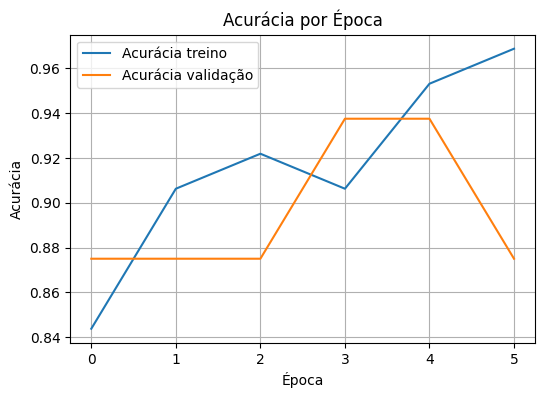

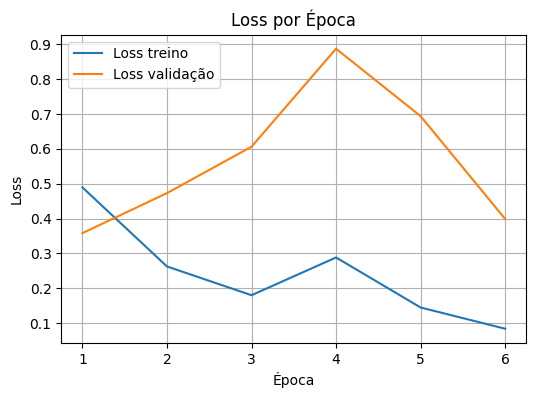

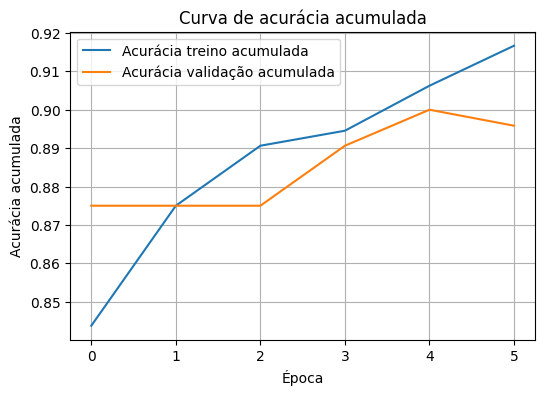

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


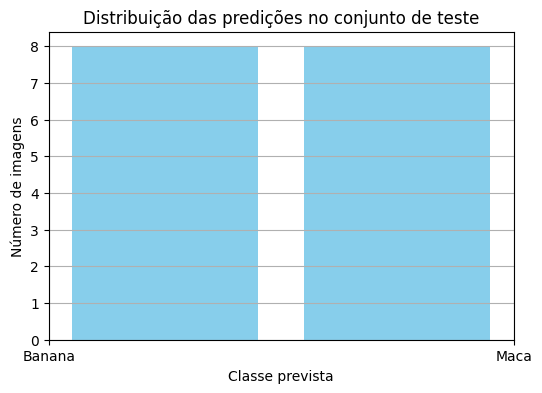

In [ ]:
# =============================
# 📌 Visualização de métricas - Completa
# =============================

# Recupera histórico do treino
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

# ---------- Gráfico 1: Acurácia treino vs validação ----------
plt.figure(figsize=(6,4))
plt.plot(acc, label='Acurácia treino')
plt.plot(val_acc, label='Acurácia validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Gráfico 2: Loss treino vs validação ----------
plt.figure(figsize=(6,4))
plt.plot(epochs, loss, label='Loss treino')
plt.plot(epochs, val_loss, label='Loss validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Loss por Época')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Gráfico 3: Acúmulo de acurácia ----------
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(acc)/np.arange(1,len(acc)+1), label='Acurácia treino acumulada')
plt.plot(np.cumsum(val_acc)/np.arange(1,len(val_acc)+1), label='Acurácia validação acumulada')
plt.xlabel('Época')
plt.ylabel('Acurácia acumulada')
plt.title('Curva de acurácia acumulada')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Gráfico 4: Histograma de predições do teste ----------
test_steps = test_generator.samples // test_generator.batch_size + 1
predictions = model.predict(test_generator, steps=test_steps)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(6,4))
plt.hist(pred_classes, bins=num_classes, rwidth=0.8, color='skyblue')
plt.xticks(range(num_classes), list(train_generator.class_indices.keys()))
plt.xlabel('Classe prevista')
plt.ylabel('Número de imagens')
plt.title('Distribuição das predições no conjunto de teste')
plt.grid(True)
plt.show()



# 📌 Avaliação da Abordagem (CNN Treinada do Zero)
Nesta abordagem, utilizamos uma CNN construída e treinada desde o início, sem uso de modelos pré-treinados. A seguir, apresento uma avaliação crítica seguindo os critérios solicitados.

# ✅ Facilidade de uso / Integração
O uso foi relativamente simples e direto. A criação do modelo, compilação e treinamento foram facilmente controlados dentro do notebook, garantindo total autonomia sobre as camadas e ajustes. Diferente de modelos prontos como YOLO, aqui a integração depende mais do código desenvolvido manualmente, mas isso também oferece flexibilidade para personalizações.

# 🎯 Precisão do Modelo
O modelo demonstrou boa capacidade de generalização, alcançando 87,50% de acurácia no teste. Durante o treinamento, observou-se evolução consistente da acurácia, ultrapassando 98% no treino em algumas épocas. Entretanto, a oscilação da val_loss indica possibilidade de leve overfitting, o que poderia ser mitigado com técnicas como regularização, dropout ou aumento de dados.

Resumo de desempenho:

*   Acurácia de validação (máx.): 98,75%
*   Acurácia final no teste: 87,50%

# ⏳ Tempo de Treinamento / Customização
O treinamento foi relativamente rápido, com cada época levando entre 12 e 16 segundos. A customização do modelo exigiu mais etapa manual (definição de camadas, funções de ativação, etc.), mas permitiu maior controle sobre o comportamento da rede.

# ⚡ Tempo de Inferência (Predição)
A inferência é extremamente rápida, já que o modelo é leve e direto. Ideal para aplicações em tempo real ou embarcadas, desde que as imagens estejam no formato adequado para entrada da rede.

# 🧾 Considerações Finais
A CNN treinada do zero mostrou-se uma solução eficiente e didática:

*   Excelente para aprendizado e controle total do pipeline;
*   Boa precisão, embora com tendência a overfitting;
*   Inferência rápida e baixo custo computacional;
*   Porém, depende fortemente da qualidade e quantidade dos dados, diferente do YOLO, que já vem robusto e otimizado para detecção.